In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
K50 = pd.read_excel('K50.xlsx',index_col=0)
K50.head()

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
0,1,NaN,0.0,0.4,0.4,Top soil
1,2,NaN,0.4,6.0,5.6,Silty clay
2,3,NaN,6.0,11.0,5.0,Clay
3,4,NaN,11.0,20.0,9.0,Pebbly sand
4,5,NaN,20.0,61.6,41.6,Pebbly sand


In [3]:
import matplotlib.colors as mcolors

In [4]:
n = mcolors.CSS4_COLORS.keys()
n = pd.DataFrame(data=n, index=None)

c = mcolors.CSS4_COLORS.values()
c = pd.DataFrame(data=c, index=None)
cn = pd.concat([n,c], axis=1)
cn.rename(columns = {0:'name' , 0: ' color code'}, inplace = True)

In [5]:
colors = []
names = []
for i in range (21) : 
    i = np.random.randint(len(cn.values)/2)
    names.append(cn.iloc[i,0])
    colors.append(cn.iloc[i,1])
    
names, colors = np.array(names), np.array(colors)
print(names)
print(colors)

['blanchedalmond' 'dodgerblue' 'honeydew' 'dodgerblue' 'crimson'
 'darkblue' 'lightgreen' 'antiquewhite' 'lavenderblush' 'aquamarine'
 'cornflowerblue' 'aliceblue' 'blanchedalmond' 'darkred' 'chartreuse'
 'green' 'indigo' 'green' 'darkturquoise' 'cyan' 'antiquewhite']
['#FFEBCD' '#1E90FF' '#F0FFF0' '#1E90FF' '#DC143C' '#00008B' '#90EE90'
 '#FAEBD7' '#FFF0F5' '#7FFFD4' '#6495ED' '#F0F8FF' '#FFEBCD' '#8B0000'
 '#7FFF00' '#008000' '#4B0082' '#008000' '#00CED1' '#00FFFF' '#FAEBD7']


In [6]:
mat_c = pd.read_excel('material_colors.xlsx',index_col=0)
mat_c['name']= names
mat_c['color']= colors
print(mat_c)

                                      name    color
material                                           
Top soil                    blanchedalmond  #FFEBCD
Silty clay                      dodgerblue  #1E90FF
Clay                              honeydew  #F0FFF0
Pebbly sand                     dodgerblue  #1E90FF
Sand                               crimson  #DC143C
Silty sand                        darkblue  #00008B
Pebbly gravelly sand            lightgreen  #90EE90
Gravelly sand                 antiquewhite  #FAEBD7
Clayey lignite               lavenderblush  #FFF0F5
Silty sand and Silty clay       aquamarine  #7FFFD4
Sandstone                   cornflowerblue  #6495ED
Sand, sandstone                  aliceblue  #F0F8FF
Layer Material Description  blanchedalmond  #FFEBCD
Sandy clay                         darkred  #8B0000
Clay, sandstone                 chartreuse  #7FFF00
Silty sand, siltstone                green  #008000
Clayey siltstone                    indigo  #4B0082
Siltstone   

In [7]:
K50_plot = pd.merge(K50, mat_c, left_on=["Layer Material Description"],
                    right_index=True, how="left", sort=False)
K50_plot

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description,name,color
0,1,NaN,0.0,0.4,0.4,Top soil,blanchedalmond,#FFEBCD
1,2,NaN,0.4,6.0,5.6,Silty clay,dodgerblue,#1E90FF
2,3,NaN,6.0,11.0,5.0,Clay,honeydew,#F0FFF0
3,4,NaN,11.0,20.0,9.0,Pebbly sand,dodgerblue,#1E90FF
4,5,NaN,20.0,61.6,41.6,Pebbly sand,dodgerblue,#1E90FF
...,...,...,...,...,...,...,...,...
109,111,NaN,1092.0,1120.0,28.0,Silty sand and Silty clay,aquamarine,#7FFFD4
110,112,NaN,1120.0,1122.2,2.2,Clayey lignite,lavenderblush,#FFF0F5
111,113,NaN,1122.2,1160.0,37.8,"Sand, sandstone",aliceblue,#F0F8FF
112,114,NaN,1160.0,1170.0,10.0,Clay,honeydew,#F0FFF0


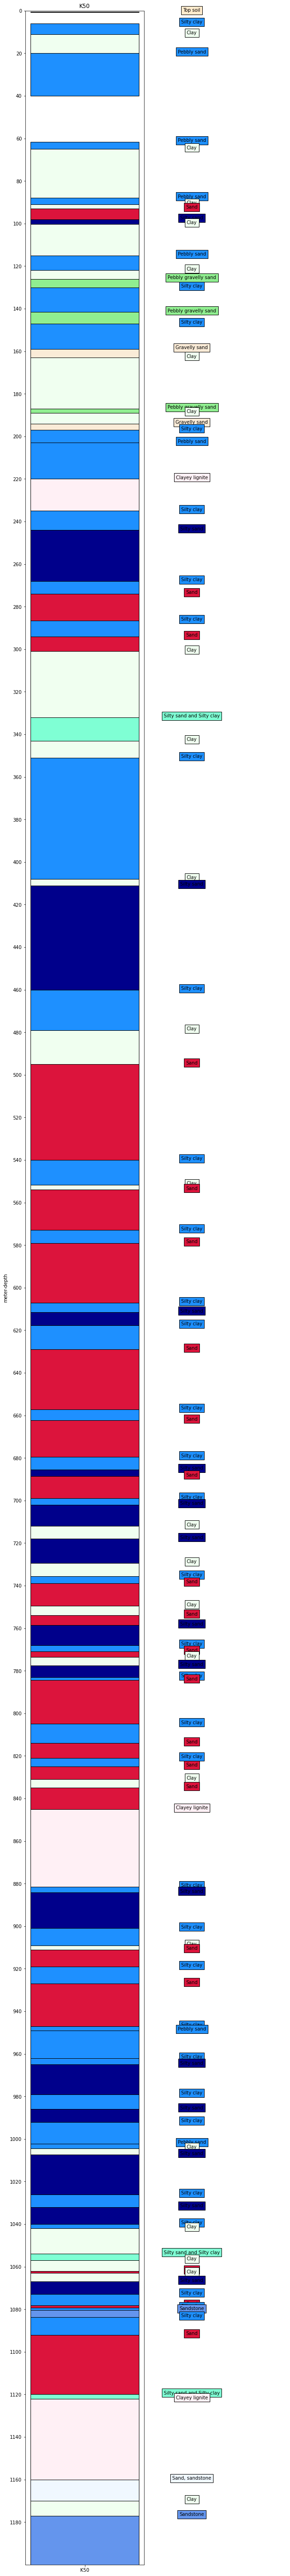

In [8]:
fig, ax= plt.subplots(nrows=1,ncols=2, sharey=True, figsize = (10,100))

x=['K50']
height = 0

for j in range(len(K50_plot['Layer Material Description'])):
    height += K50_plot['Thick. (m)'].values[j]
    mate =  K50_plot['Layer Material Description'].values[j]
    c = K50_plot['name'].values[j]

    ax[0].bar(x, height, bottom=height, facecolor=c, edgecolor = 'black')
    ax[0].set_yticks(np.arange(0,1200,20))
    ax[0].set_ylabel('meter-depth')
    ax[0].set_ylim([1200,0])
    ax[0].set_title('K50')
    ax[1].text(.2, height,s=mate, color='black', backgroundcolor=c,
               bbox = dict(facecolor=c, alpha=1), ha = 'center')
    ax[1].axis('off')

In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [38]:
np.meshgrid(K50_plot['Thick. (m)'].values)

[array([ 0.4,  5.6,  5. ,  9. , 41.6,  3.4, 23. ,  3. ,  2. ,  5. ,  2.2,
        14.8,  7. ,  4. ,  4. , 11.6,  5.4, 12. ,  4. , 24. ,  2. ,  5. ,
         3. ,  6. , 17. , 15. ,  9. , 24. ,  6. , 12.6,  7.4,  7. , 31. ,
        11. ,  8. , 57. ,  3. , 49. , 19. , 16. , 45. , 11.6,  2.4, 19. ,
         6. , 28. ,  4.6,  6. , 11.4, 28.2,  5.2, 17.2,  5.8,  3.2, 10.4,
         3. , 10. ,  6. , 11.4,  6.2,  3.2, 10.8,  4.4,  4.6,  9.4,  3. ,
         2.6,  4. ,  5.4,  1.4, 20.6,  9. ,  7. ,  4. ,  6. ,  4. , 10. ,
        36.4,  2.8, 16.8,  8. ,  2. ,  8. ,  8. , 20. ,  2. , 13. ,  3. ,
        14. ,  7. ,  6. , 10.2,  2.2,  3. , 18.6,  6. ,  8. ,  2. , 12. ,
         3. ,  5. ,  1. ,  4. ,  6. ,  5.2,  1. ,  1.2,  3.2,  8.4, 28. ,
         2.2, 37.8, 10. ,  7. ])]

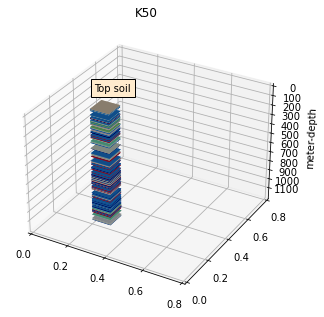

In [70]:

fig = plt.figure(figsize = (5,100))
ax1 = fig.add_subplot(projection='3d')
# ax2 = fig.add_subplot(projection='3d')
# ax3 = fig.add_subplot(projection='3d')
# ax4 = fig.add_subplot(projection='3d')

height_50 = 0

for a in range(len(K50_plot['Layer Material Description'])):
    height_50 += K50_plot['Thick. (m)'].values[a]
    mate_50 =  K50_plot['Layer Material Description'].values[a]
    c_50 = K50_plot['name'].values[a]
    
    xpos_50 = 0.2
    ypos_50 = 0.2
    zpos_50 = height_50
    
    dx = 0.1
    dy = 0.1
    dz = 0.1


    ax1.bar3d(xpos_50, ypos_50, zpos_50, dx, dy, dz, color=c_50, zsort='average') #edgecolor = 'black'
    ax1.set_zticks(np.arange(0,1200,100))
    ax1.set_zlabel('meter-depth')
    ax1.set_zlim([1200,0])
    ax1.set_xticks(np.arange(0,1,0.2))
    ax1.set_yticks(np.arange(0,1,0.2))
    ax1.set_title('K50')
    ax1.text(0.2,zpos_50,0.2, s=mate_50, color='black', backgroundcolor=c_50,
             bbox = dict(facecolor=c_50, alpha=1), ha = 'center')

In [72]:
K75 = pd.read_excel('K75.xlsx',index_col=0)
K75_plot = pd.merge(K75, mat_c, left_on=["Layer Material Description"], right_index=True, how="left", sort=False)

K77 = pd.read_excel('K77.xlsx',index_col=0)
K77_plot = pd.merge(K77, mat_c, left_on=["Layer Material Description"], right_index=True, how="left", sort=False)

K123 = pd.read_excel('K123.xlsx',index_col=0)
K123_plot = pd.merge(K123, mat_c, left_on=["Layer Material Description"], right_index=True, how="left", sort=False)


Text(0.5, 0.92, 'Well')

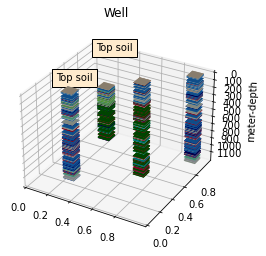

In [112]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

height_50 = 0
height_75 = 0
height_77 = 0
height_123 = 0

for a in range(len(K50_plot['Layer Material Description'])):
    height_50 += K50_plot['Thick. (m)'].values[a]
    mate_50 =  K50_plot['Layer Material Description'].values[a]
    c_50 = K50_plot['name'].values[a]
    
    xpos_50 = 0.20
    ypos_50 = 0.2
    zpos_50 = height_50
    
    dx = 0.1
    dy = 0.1
    dz = 0.1

    ax.bar3d(xpos_50, ypos_50, zpos_50, dx, dy, dz, color=c_50, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_50,0.2, s=mate_50, color='black', backgroundcolor=c_50,
             bbox = dict(facecolor=c_50, alpha=1), ha = 'center')
    
for b in range(len(K75_plot['Layer Material Description'])):
    height_75 += K75_plot['Thick. (m)'].values[b]
    mate_K75 =  K75_plot['Layer Material Description'].values[b]
    c_K75 = K75_plot['name'].values[b]
    
    xpos_75 = 0.40
    ypos_75 = 0.4
    zpos_75 = height_75
    
    dx = 0.1
    dy = 0.1
    dz = 0.1

    ax.bar3d(xpos_75, ypos_75, zpos_75, dx, dy, dz, color=c_K75, zsort='average') 
    ax.text(0.2,zpos_75,0.2, s=mate_K75, color='black', backgroundcolor=c_K75,
             bbox = dict(facecolor=c_K75, alpha=1), ha = 'center')


for c in range(len(K77_plot['Layer Material Description'])):
    height_77 += K77_plot['Thick. (m)'].values[c]
    mate_K77 =  K77_plot['Layer Material Description'].values[c]
    c_K77 = K77_plot['name'].values[c]
    
    xpos_77 = 0.60
    ypos_77 = 0.6
    zpos_77 = height_77
    
    dx = 0.1
    dy = 0.1
    dz = 0.1

    ax.bar3d(xpos_77, ypos_77, zpos_77, dx, dy, dz, color=c_K77, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_77,0.2, s=mate_K77, color='black', backgroundcolor=c_K77,
             bbox = dict(facecolor=c_K77, alpha=1), ha = 'center')

for d in range(len(K123_plot['Layer Material Description'])):
    height_123 += K123_plot['Thick. (m)'].values[d]
    mate_K123 =  K123_plot['Layer Material Description'].values[d]
    c_K123 = K123_plot['name'].values[d]
    
    xpos_123 = 0.90
    ypos_123 = 0.9
    zpos_123 = height_123
    
    dx = 0.1
    dy = 0.1
    dz = 0.1

    ax.bar3d(xpos_123, ypos_123, zpos_123, dx, dy, dz, color=c_K123, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_123,0.2, s=mate_K123, color='black', backgroundcolor=c_K123,
             bbox = dict(facecolor=c_K123, alpha=1), ha = 'center')
    
ax.set_zticks(np.arange(0,1200,100))
ax.set_zlabel('meter-depth')
ax.set_zlim([1200,0])
ax.set_xticks(np.arange(0,1,0.2))
ax.set_yticks(np.arange(0,1,0.2))
ax.set_title('Well')

In [89]:
fig.savefig('3D_Well.jpg', dpi = 300)

In [92]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource

In [99]:
# Load and format data
dem = np.load('jacksboro_fault_dem.npz')
dem

In [109]:
lst = dem.files
for item in lst:
    print(item)
    print(dem[item])

elevation
[[483 487 491 ... 446 431 444]
 [475 486 489 ... 432 440 457]
 [479 485 488 ... 437 463 468]
 ...
 [597 592 582 ... 259 268 274]
 [570 567 551 ... 265 271 274]
 [545 543 532 ... 268 270 272]]
dx
0.0008333333333333334
xmax
-84.07791666666667
dy
0.0008333333333333334
xmin
-84.41375
ymin
36.73291666666667
ymax
36.44625


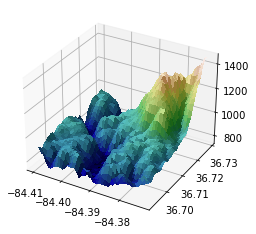

In [149]:
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x,y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]*2

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

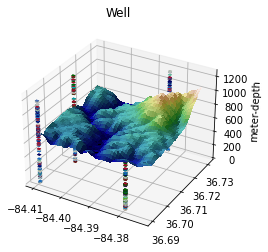

In [160]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

height_50 = 0
height_75 = 0
height_77 = 0
height_123 = 0

dx = 0.001
dy = 0.001
dz = 0.001

for a in range(len(K50_plot['Layer Material Description'])):
    height_50 += K50_plot['Thick. (m)'].values[a]
    mate_50 =  K50_plot['Layer Material Description'].values[a]
    c_50 = K50_plot['name'].values[a]
    
    xpos_50 = -84.41
    ypos_50 = 36.69
    zpos_50 = height_50

    ax.bar3d(xpos_50, ypos_50, zpos_50, dx, dy, dz, color=c_50, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_50,0.2, s=mate_50, color='black', backgroundcolor=c_50,
             bbox = dict(facecolor=c_50, alpha=1), ha = 'center')
    
for b in range(len(K75_plot['Layer Material Description'])):
    height_75 += K75_plot['Thick. (m)'].values[b]
    mate_K75 =  K75_plot['Layer Material Description'].values[b]
    c_K75 = K75_plot['name'].values[b]
    
    xpos_75 = -84.38
    ypos_75 = 36.69
    zpos_75 = height_75

    ax.bar3d(xpos_75, ypos_75, zpos_75, dx, dy, dz, color=c_K75, zsort='average') 
    ax.text(0.2,zpos_75,0.2, s=mate_K75, color='black', backgroundcolor=c_K75,
             bbox = dict(facecolor=c_K75, alpha=1), ha = 'center')


for c in range(len(K77_plot['Layer Material Description'])):
    height_77 += K77_plot['Thick. (m)'].values[c]
    mate_K77 =  K77_plot['Layer Material Description'].values[c]
    c_K77 = K77_plot['name'].values[c]
    
    xpos_77 = -84.407
    ypos_77 = 36.707
    zpos_77 = height_77

    ax.bar3d(xpos_77, ypos_77, zpos_77, dx, dy, dz, color=c_K77, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_77,0.2, s=mate_K77, color='black', backgroundcolor=c_K77,
             bbox = dict(facecolor=c_K77, alpha=1), ha = 'center')

for d in range(len(K123_plot['Layer Material Description'])):
    height_123 += K123_plot['Thick. (m)'].values[d]
    mate_K123 =  K123_plot['Layer Material Description'].values[d]
    c_K123 = K123_plot['name'].values[d]
    
    xpos_123 = -84.385
    ypos_123 = 36.73
    zpos_123 = height_123

    ax.bar3d(xpos_123, ypos_123, zpos_123, dx, dy, dz, color=c_K123, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_123,0.2, s=mate_K123, color='black', backgroundcolor=c_K123,
             bbox = dict(facecolor=c_K123, alpha=1), ha = 'center')
    
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]*1.5

# Set up plot
# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')

ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

ax.set_zticks(np.arange(0,1400,200))
ax.set_zlabel('meter-depth')
ax.set_title('Well')

plt.show()

In [161]:
fig.savefig('3D_Ele.jpg', dpi=900)

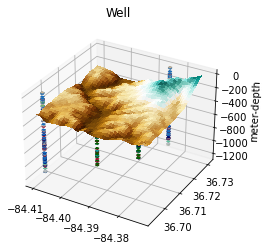

In [186]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]-700

# Set up plot
# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.BrBG, vert_exag=0.1, blend_mode='soft')

ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

height_50 = 0
height_75 = 0
height_77 = 0
height_123 =0

dx = 0.001
dy = 0.001
dz = 0.001

for a in range(len(K50_plot['Layer Material Description'])):
    height_50 -= K50_plot['Thick. (m)'].values[a]
    mate_50 =  K50_plot['Layer Material Description'].values[a]
    c_50 = K50_plot['name'].values[a]
    
    xpos_50 = -84.41
    ypos_50 = 36.695
    zpos_50 = height_50

    ax.bar3d(xpos_50, ypos_50, zpos_50, dx, dy, dz, color=c_50, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_50,0.2, s=mate_50, color='black', backgroundcolor=c_50,
             bbox = dict(facecolor=c_50, alpha=1), ha = 'center')
    
for b in range(len(K75_plot['Layer Material Description'])):
    height_75 -= K75_plot['Thick. (m)'].values[b]
    mate_K75 =  K75_plot['Layer Material Description'].values[b]
    c_K75 = K75_plot['name'].values[b]
    
    xpos_75 = -84.38
    ypos_75 = 36.70
    zpos_75 = height_75

    ax.bar3d(xpos_75, ypos_75, zpos_75, dx, dy, dz, color=c_K75, zsort='average') 
    ax.text(0.2,zpos_75,0.2, s=mate_K75, color='black', backgroundcolor=c_K75,
             bbox = dict(facecolor=c_K75, alpha=1), ha = 'center')


for c in range(len(K77_plot['Layer Material Description'])):
    height_77 -= K77_plot['Thick. (m)'].values[c]
    mate_K77 =  K77_plot['Layer Material Description'].values[c]
    c_K77 = K77_plot['name'].values[c]
    
    xpos_77 = -84.40
    ypos_77 = 36.71
    zpos_77 = height_77

    ax.bar3d(xpos_77, ypos_77, zpos_77, dx, dy, dz, color=c_K77, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_77,0.2, s=mate_K77, color='black', backgroundcolor=c_K77,
             bbox = dict(facecolor=c_K77, alpha=1), ha = 'center')

for d in range(len(K123_plot['Layer Material Description'])):
    height_123 -= K123_plot['Thick. (m)'].values[d]
    mate_K123 =  K123_plot['Layer Material Description'].values[d]
    c_K123 = K123_plot['name'].values[d]
    
    xpos_123 = -84.385
    ypos_123 = 36.73
    zpos_123 = height_123

    ax.bar3d(xpos_123, ypos_123, zpos_123, dx, dy, dz, color=c_K123, zsort='average') #edgecolor = 'black'
    ax.text(0.2,zpos_123,0.2, s=mate_K123, color='black', backgroundcolor=c_K123,
             bbox = dict(facecolor=c_K123, alpha=1), ha = 'center')

# ax.set_zticks(np.arange(0,1400,200))
ax.set_zlabel('meter-depth')
ax.set_title('Well')

plt.show()

In [187]:
fig.savefig('3D_Ele_2.jpg', dpi=900)